<a href="https://colab.research.google.com/github/KotraHaridutt/Practical-ML-CV/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pylab as plt

In [2]:
print(tf.__version__)

2.19.0


In [3]:
import pathlib

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

archive = tf.keras.utils.get_file(fname="flower_photos",origin=dataset_url,extract=True)
data_dir = pathlib.Path(archive)/'flower_photos'


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
print(len(list(data_dir.glob('*/*.jpg'))))

3670


In [6]:
# Get class names from the subdirectories in data_dir
class_names = sorted([item.name for item in data_dir.iterdir() if item.is_dir()])
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [7]:
#print(data_dir/'daisy')
#print(len(list((data_dir/'daisy').glob('*.jpg'))))

for clas in class_names:
  count = len(list((data_dir/clas).glob('*.jpg')))
  print(f"The count of {clas} is {count}")


The count of daisy is 633
The count of dandelion is 898
The count of roses is 641
The count of sunflowers is 699
The count of tulips is 799


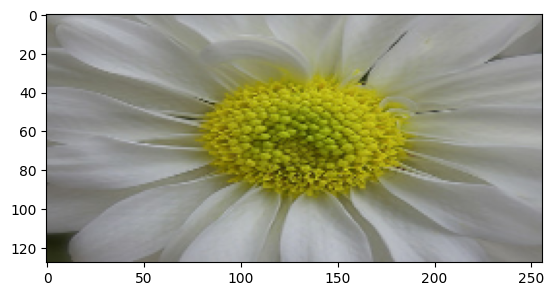

In [8]:
def read_and_decode(file_name, reshape_dims):
  img = tf.io.read_file(str(file_name))
  img = tf.image.decode_jpeg(img,channels = 3)
  img = tf.image.convert_image_dtype(img,tf.float32)
  img = tf.image.resize(img,reshape_dims)

  return img

def show_image(file_name):
  img = read_and_decode(file_name,reshape_dims)
  plt.imshow((img.numpy()))

reshape_dims = [128,256]
show_image(data_dir/'daisy'/'100080576_f52e8ee070_n.jpg')

/root/.keras/datasets/flower_photos/flower_photos/tulips/8702982836_75222725d7.jpg
/root/.keras/datasets/flower_photos/flower_photos/tulips/8712268519_f4c2c39a06_n.jpg
/root/.keras/datasets/flower_photos/flower_photos/tulips/7166606598_5d2cd307c3.jpg
/root/.keras/datasets/flower_photos/flower_photos/tulips/14084749296_6143c74c72_m.jpg
/root/.keras/datasets/flower_photos/flower_photos/tulips/13530690445_9f1f5cf43a_n.jpg


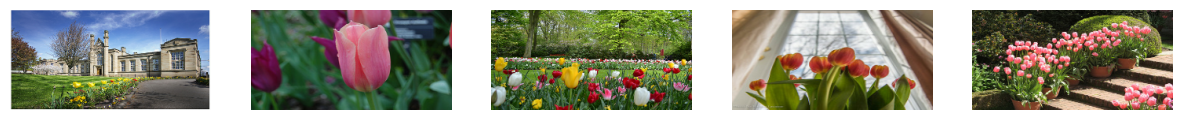

In [11]:
tulips = tf.io.gfile.glob(str(data_dir/'tulips'/'*.jpg'))
f, ax = plt.subplots(1,5, figsize=(15,15))
for idx,filename in enumerate(tulips[:5]):
  print(filename)
  img = read_and_decode(filename, [128,256])
  ax[idx].imshow((img.numpy()))
  ax[idx].axis('off')